In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
titanic_train= pd.read_csv('train.csv')
titanic_test= pd.read_csv('test.csv')

In [3]:
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Analyze the data

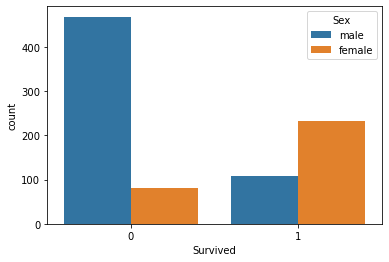

In [4]:
sns.countplot(x ='Survived', hue='Sex', data=titanic_train)

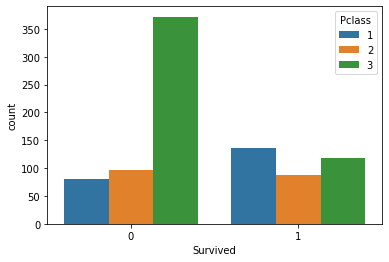

In [5]:
sns.countplot(x ='Survived', hue='Pclass', data=titanic_train)

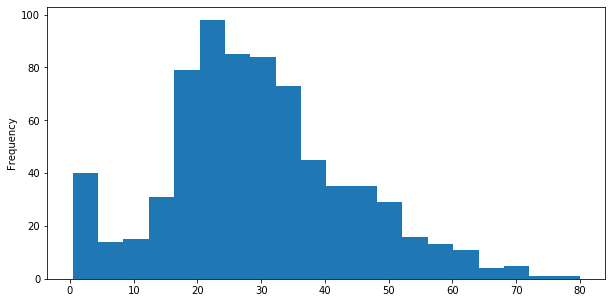

In [6]:
titanic_train['Age'].plot.hist(bins = 20, figsize=(10,5))

In [7]:
titanic_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
titanic_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


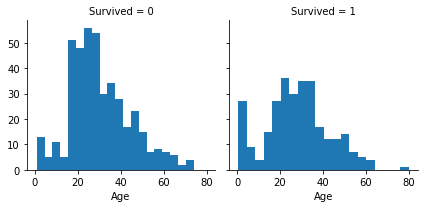

In [9]:
g = sns.FacetGrid(titanic_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

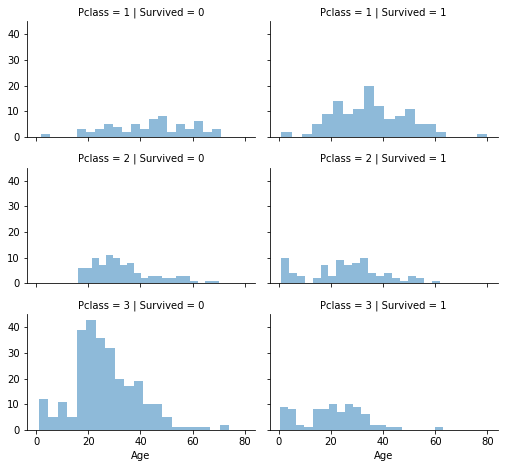

In [10]:
grid = sns.FacetGrid(titanic_train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/home/ravi/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/ravi/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/ravi/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


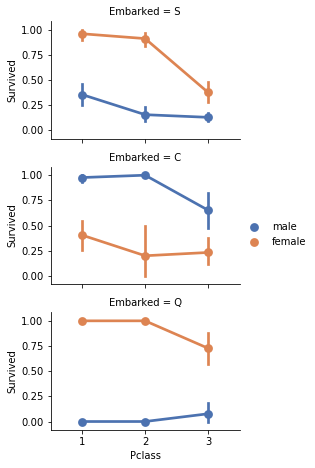

In [11]:
grid = sns.FacetGrid(titanic_train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

## Data Wrangling

In [12]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

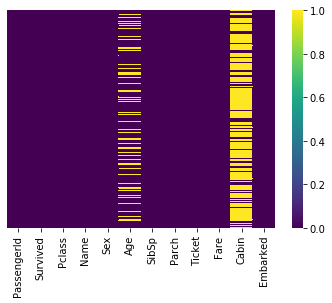

In [13]:
sns.heatmap(titanic_train.isnull(), yticklabels=False, cmap='viridis')

In [14]:
pd.get_dummies(titanic_train['Sex'], drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [15]:
titanic_train.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [16]:
def fills_na(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38.233441
        elif Pclass==2:
            return 29.87763
        else:
            return 25.14062
        
    else:
        return Age
    

In [17]:
titanic_train['Age']= titanic_train[['Age','Pclass']].apply(fills_na,axis=1)

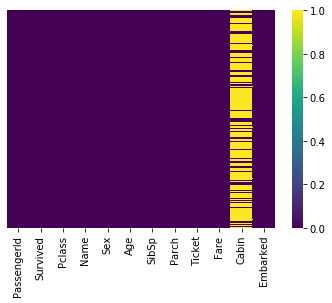

In [18]:
sns.heatmap(titanic_train.isnull(), yticklabels=False, cmap='viridis')

In [19]:
titanic_train.dropna(axis=0, subset=['Embarked'], inplace=True)

In [20]:
len(titanic_train['PassengerId'])

889

In [21]:
sex= pd.get_dummies(titanic_train['Sex'], drop_first=True)

In [22]:
embark = pd.get_dummies(titanic_train['Embarked'], drop_first=True)
Pcl = pd.get_dummies(titanic_train['Pclass'], drop_first=True)

In [23]:
train_data= pd.concat([titanic_train,sex,Pcl,embark], axis=1)

In [24]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,2,3,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,NaN,S,1,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,B42,S,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,NaN,S,0,0,1,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C148,C,1,0,0,0,0


In [25]:
train_data.drop(['PassengerId','Pclass','Name','Sex','Ticket','Cabin','Embarked'], axis=1,inplace=True)

In [26]:
train_data.dtypes

Survived      int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
male          uint8
2             uint8
3             uint8
Q             uint8
S             uint8
dtype: object

In [27]:
# train_data.Q = train_data.Q.astype('float64')

In [28]:
X = train_data.drop('Survived', axis=1)
y= train_data['Survived']
X

,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,22.00000,1,0,7.2500,1,0,1,0,1
1,38.00000,1,0,71.2833,0,0,0,0,0
2,26.00000,0,0,7.9250,0,0,1,0,1
3,35.00000,1,0,53.1000,0,0,0,0,1
4,35.00000,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,27.00000,0,0,13.0000,1,1,0,0,1
887,19.00000,0,0,30.0000,0,0,0,0,1
888,25.14062,1,2,23.4500,0,0,1,0,1
889,26.00000,0,0,30.0000,1,0,0,0,0


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=2)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logmodel = LogisticRegression()

In [33]:
logmodel.fit(X_train,y_train)

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
predictions = logmodel.predict(X_test)
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,

In [35]:
from sklearn.metrics import classification_report

In [36]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.84      0.91      0.88       192\n           1       0.84      0.72      0.78       120\n\n    accuracy                           0.84       312\n   macro avg       0.84      0.82      0.83       312\nweighted avg       0.84      0.84      0.84       312\n'

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_test, predictions)

array([[175,  17],
       [ 33,  87]])

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8397435897435898

In [40]:
titanic_test['Age']= titanic_test[['Age','Pclass']].apply(fills_na,axis=1)
titanic_test.dropna(axis=0, subset=['Embarked','Fare'], inplace=True)
sex1 = pd.get_dummies(titanic_test['Sex'], drop_first=True)
embark1 = pd.get_dummies(titanic_test['Embarked'], drop_first=True)
Pcl1 = pd.get_dummies(titanic_test['Pclass'], drop_first=True)
test_data= pd.concat([titanic_test,sex1,Pcl1,embark1], axis=1)
test_data.drop(['PassengerId','Pclass','Name','Sex','Ticket','Cabin','Embarked'], axis=1,inplace=True)
test_data.isnull().sum()


Age      0
SibSp    0
Parch    0
Fare     0
male     0
2        0
3        0
Q        0
S        0
dtype: int64

In [41]:
y_pred = logmodel.predict(test_data)

In [42]:
test_data_first = test_data.head(312)
test_data_last = test_data.tail(312)

In [43]:
y_pred_first = logmodel.predict(test_data_first)
y_pred_last = logmodel.predict(test_data_last)

In [44]:
accuracy_score(y_test, y_pred_first)

0.5256410256410257

In [45]:
accuracy_score(y_test, y_pred_last)

0.5416666666666666

In [46]:
submission = pd.DataFrame({"PassengerId": titanic_test["PassengerId"],"Survived": y_pred})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [47]:
submission['Survived'].value_counts()

0    268
1    149
Name: Survived, dtype: int64

In [48]:
submission.to_csv('titanic_lr_submission.csv')